In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

sns.set_style('whitegrid')

# Problem definition

Cluster consumers based on the purchase amount of Black Friday

https://www.kaggle.com/mehdidag/black-friday

# Load the data

In [2]:
#input
df = pd.read_csv('data/black_friday_processed_100K.csv')
df = df.set_index(['Gender', 'Age', 'Marital_Status'])
df.head()

User_ID Product_ID  Occupation City_Category  \
Gender Age  Marital_Status                                                 
F      0-17 0               1000001  P00069042          10             A   
            0               1000001  P00248942          10             A   
            0               1000001  P00087842          10             A   
            0               1000001  P00085442          10             A   
M      55+  0               1000002  P00285442          16             C   

                           Stay_In_Current_City_Years  Product_Category_1  \
Gender Age  Marital_Status                                                  
F      0-17 0                                       2                   3   
            0                                       2                   1   
            0                                       2                  12   
            0                                       2                  12   
M      55+  0                                      4+                   8   

                            Product_Category_2  Product_Category_3  Purchase  
Gender Age  Marital_Status                                                    
F      0-17 0                                0                   0      8370  
            0                                6                  14     15200  
            0                                0                   0      1422  
            0                               14                   0      1057  
M      55+  0                                0                   0      7969

# Feature Engineering 

In [3]:
# Transforming the categorical columns to numerical
for col in ['Occupation', 'City_Category', 'Stay_In_Current_City_Years']:
    df_dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, df_dummies], axis=1)
    # Remove the original columns
    del df[col]
df.head()

# remove columns
X_columns = list(df.columns)
if 'User_ID' in X_columns:
    X_columns.remove('User_ID')
if 'Product_ID' in X_columns:
    X_columns.remove('Product_ID')
df = df[X_columns]

# normalize the columns
df_norm = df.copy()
for col in X_columns:
    df_norm[col] = StandardScaler().fit_transform(df_norm[col].values.reshape(-1, 1))

print(df.shape)
df_norm.head()

(99999, 33)


/home/coastrock/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/coastrock/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/coastrock/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/coastrock/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/coastrock/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConve

Product_Category_1  Product_Category_2  \
Gender Age  Marital_Status                                           
F      0-17 0                        -0.616332           -1.091322   
            0                        -1.151858           -0.126040   
            0                         1.793534           -1.091322   
            0                         1.793534            1.161003   
M      55+  0                         0.722482           -1.091322   

                            Product_Category_3  Purchase  Occupation_0  \
Gender Age  Marital_Status                                               
F      0-17 0                        -0.617004 -0.186893     -0.381225   
            0                         1.620489  1.188233     -0.381225   
            0                        -0.617004 -1.585776     -0.381225   
            0                        -0.617004 -1.659264     -0.381225   
M      55+  0                        -0.617004 -0.267629     -0.381225   

                            Occupation_1  Occupation_2  Occupation_3  \
Gender Age  Marital_Status                                             
F      0-17 0                  -0.303927      -0.22235      -0.18675   
            0                  -0.303927      -0.22235      -0.18675   
            0                  -0.303927      -0.22235      -0.18675   
            0                  -0.303927      -0.22235      -0.18675   
M      55+  0                  -0.303927      -0.22235      -0.18675   

                            Occupation_4  Occupation_5  \
Gender Age  Marital_Status                               
F      0-17 0                  -0.394602     -0.145209   
            0                  -0.394602     -0.145209   
            0                  -0.394602     -0.145209   
            0                  -0.394602     -0.145209   
M      55+  0                  -0.394602     -0.145209   

                                        ...                Occupation_19  \
Gender Age  Marital_Status              ...                                
F      0-17 0                           ...                    -0.127354   
            0                           ...                    -0.127354   
            0                           ...                    -0.127354   
            0                           ...                    -0.127354   
M      55+  0                           ...                    -0.127354   

                            Occupation_20  City_Category_A  City_Category_B  \
Gender Age  Marital_Status                                                    
F      0-17 0                   -0.258156         1.636436        -0.851058   
            0                   -0.258156         1.636436        -0.851058   
            0                   -0.258156         1.636436        -0.851058   
            0                   -0.258156         1.636436        -0.851058   
M      55+  0                   -0.258156        -0.611084        -0.851058   

                            City_Category_C  Stay_In_Current_City_Years_0  \
Gender Age  Marital_Status                                                  
F      0-17 0                     -0.667231                     -0.395295   
            0                     -0.667231                     -0.395295   
            0                     -0.667231                     -0.395295   
            0                     -0.667231                     -0.395295   
M      55+  0                      1.498731                     -0.395295   

                            Stay_In_Current_City_Years_1  \
Gender Age  Marital_Status                                 
F      0-17 0                                  -0.732225   
            0                                  -0.732225   
            0                                  -0.732225   
            0                                  -0.732225   
M      55+  0                                  -0.732225   

                            Stay_In_Current_City_Years_2  

# Model Training

In [4]:
k = 7
kmeans = KMeans(n_clusters=k).fit(df_norm.values)

print(set(kmeans.labels_))
print(collections.Counter(kmeans.labels_))

df_results = df.copy()
df_norm['cluster'] = kmeans.labels_
df_results['cluster'] = kmeans.labels_

{0, 1, 2, 3, 4, 5, 6}
Counter({2: 47619, 5: 17664, 0: 16651, 4: 12995, 1: 2426, 3: 1490, 6: 1154})


[('26-35', 7071), ('36-45', 3992), ('18-25', 2966), ('46-50', 1034), ('51-55', 976)]
[('0-17', 2086), ('18-25', 307), ('55+', 20), ('36-45', 10), ('26-35', 3)]
[('26-35', 20239), ('36-45', 9019), ('18-25', 8713), ('46-50', 4251), ('51-55', 3795)]
[('55+', 956), ('51-55', 357), ('46-50', 114), ('36-45', 60), ('0-17', 3)]
[('26-35', 4853), ('18-25', 3177), ('36-45', 2540), ('46-50', 1127), ('51-55', 739)]
[('26-35', 7129), ('36-45', 3745), ('18-25', 3502), ('46-50', 1353), ('51-55', 1084)]
[('36-45', 577), ('26-35', 237), ('18-25', 106), ('51-55', 102), ('46-50', 86)]
Product_Category_1


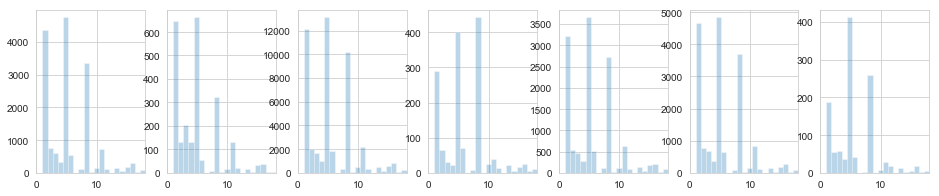

Product_Category_2


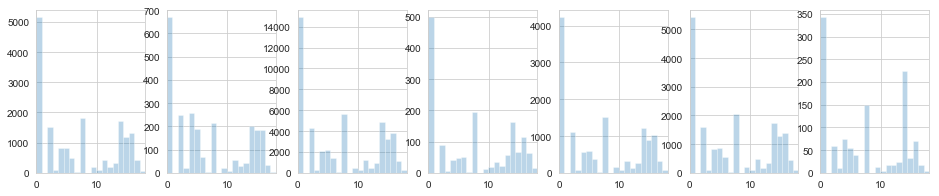

Product_Category_3


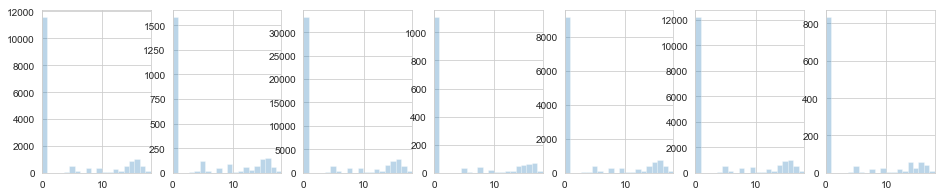

Purchase


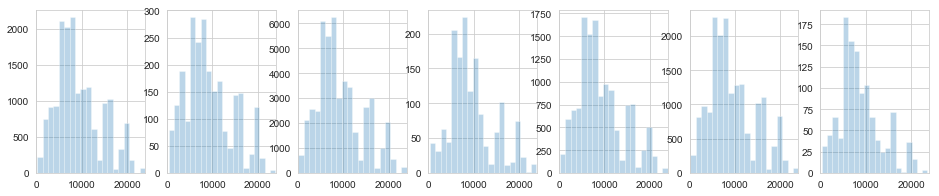

Occupation_0


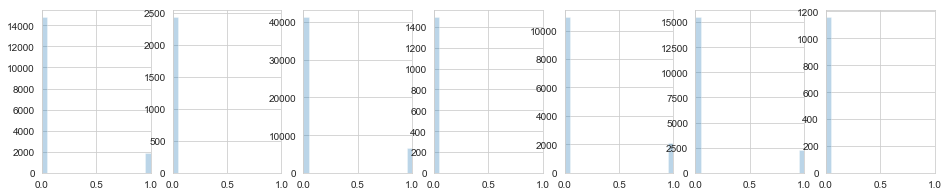

Occupation_1


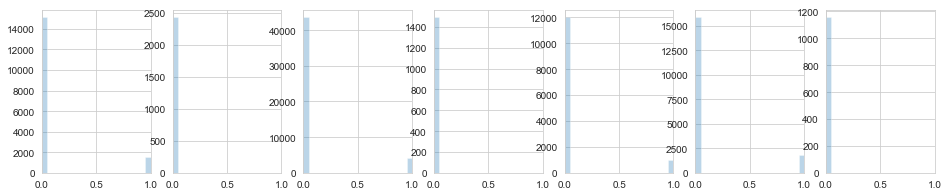

Occupation_2


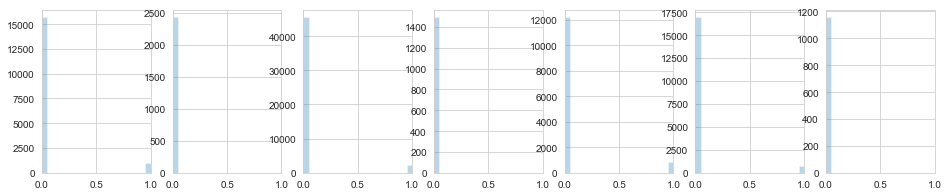

Occupation_3


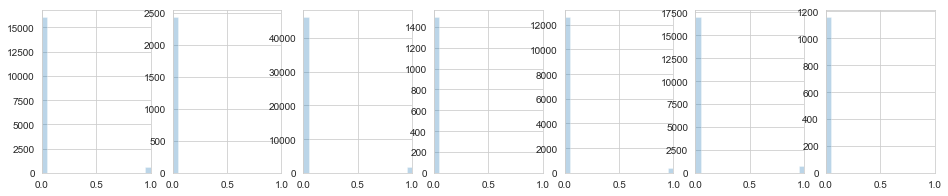

Occupation_4


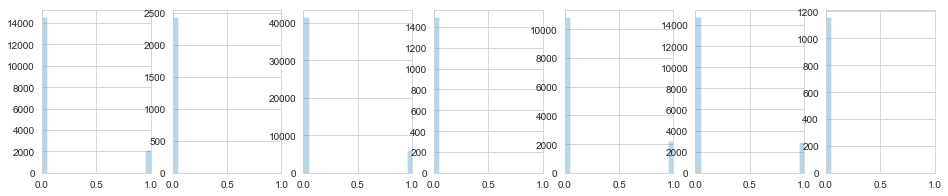

Occupation_5


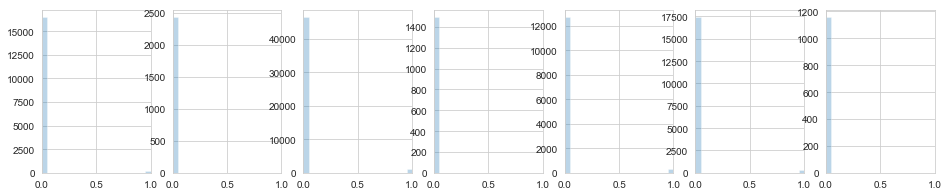

Occupation_6


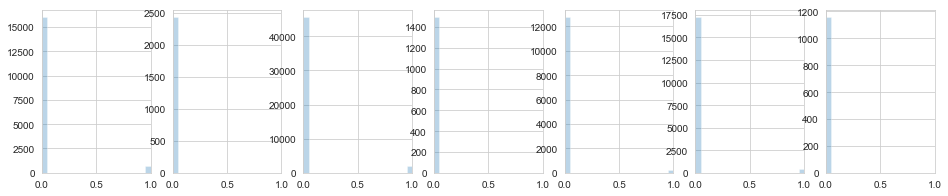

Occupation_7


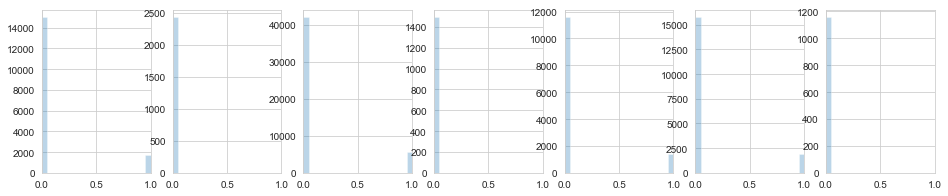

Occupation_8


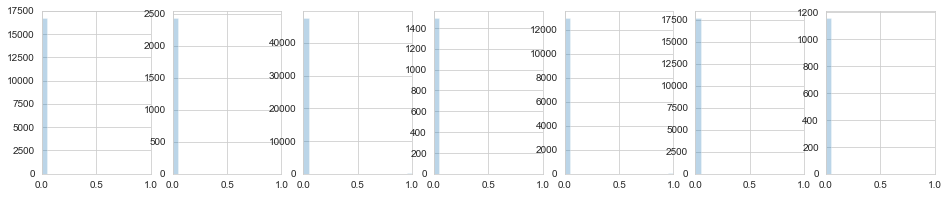

Occupation_9


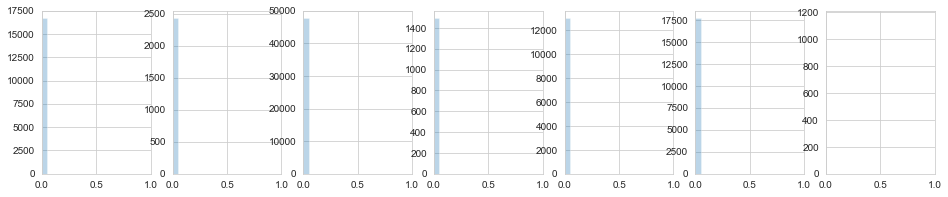

Occupation_10


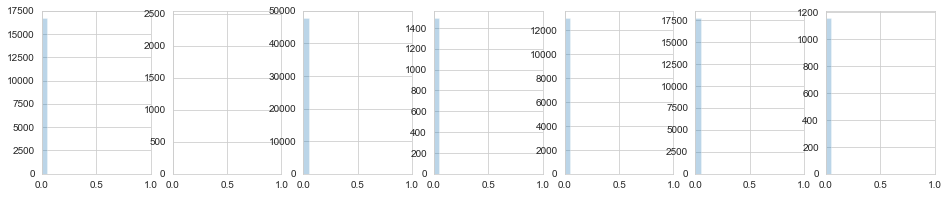

Occupation_11


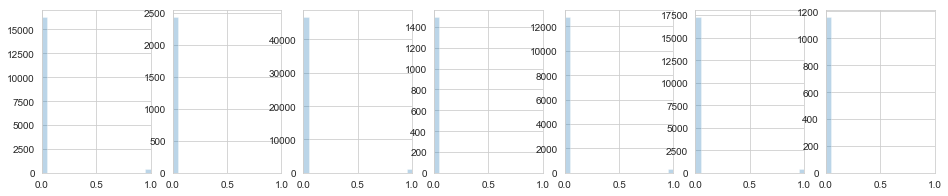

Occupation_12


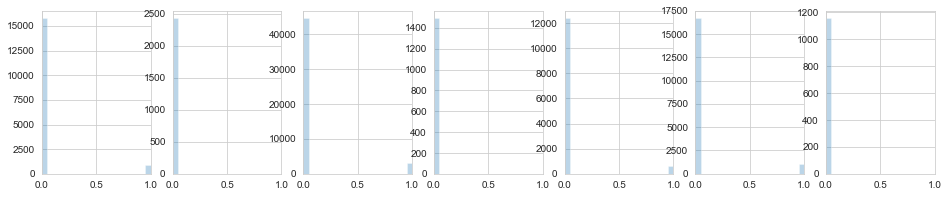

Occupation_13


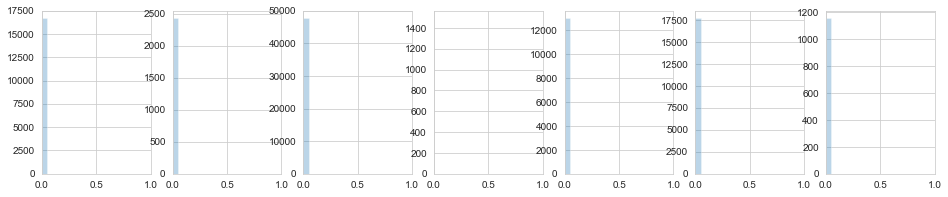

Occupation_14


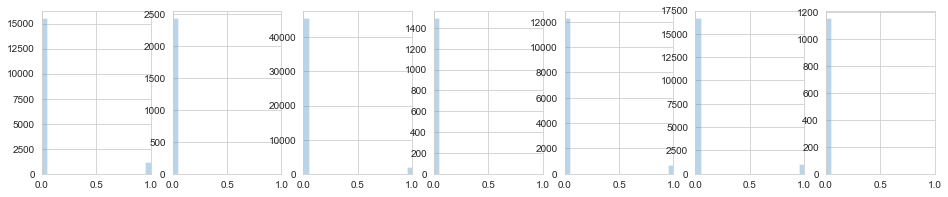

Occupation_15


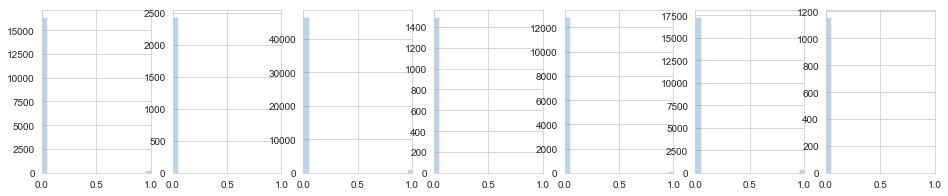

Occupation_16


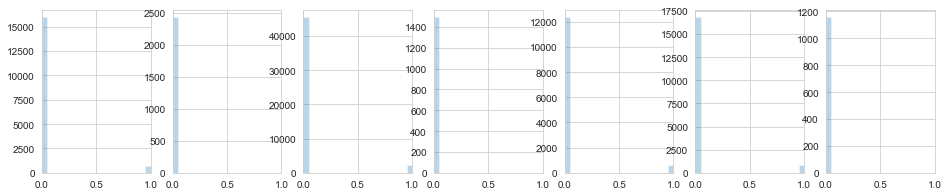

Occupation_17


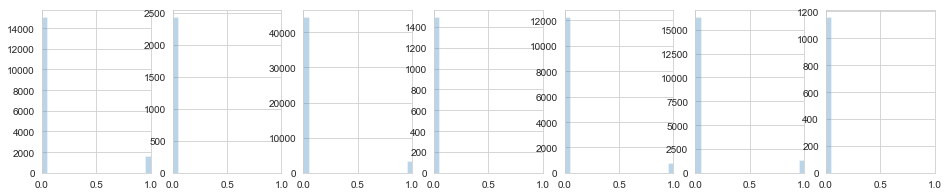

Occupation_18


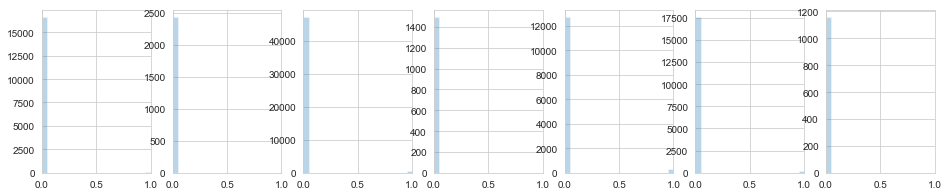

Occupation_19


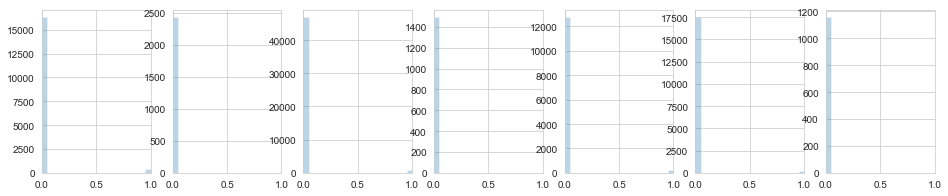

Occupation_20


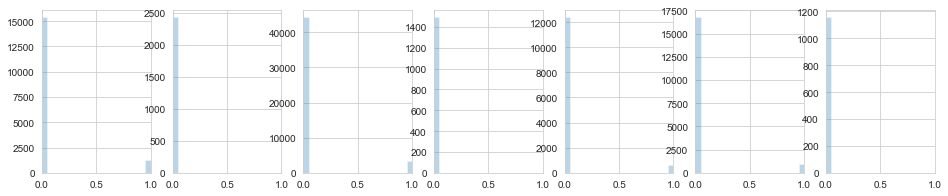

City_Category_A


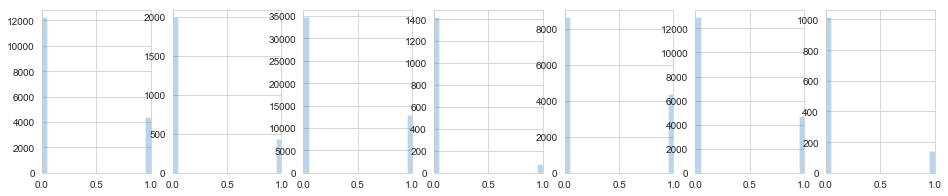

City_Category_B


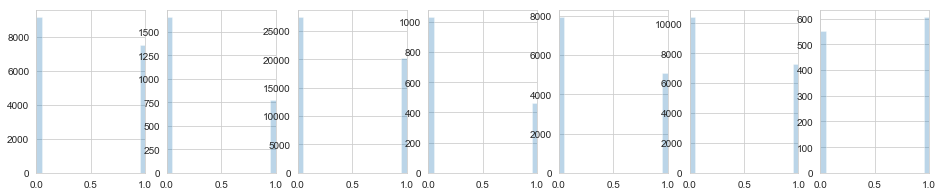

City_Category_C


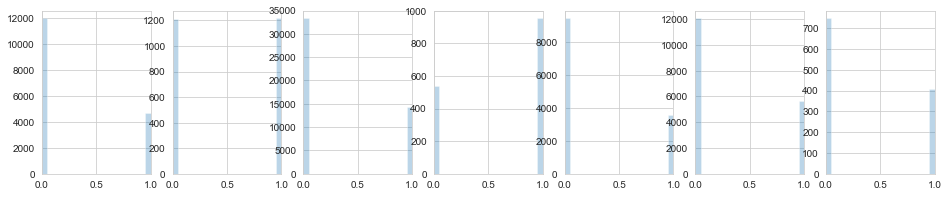

Stay_In_Current_City_Years_0


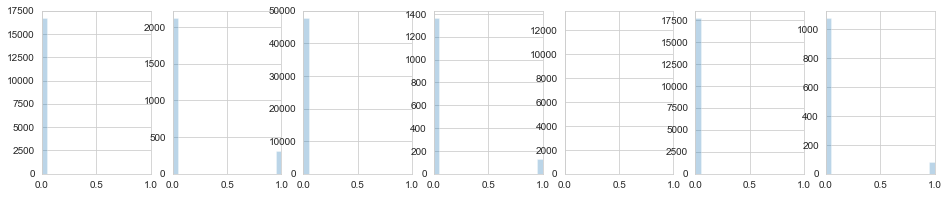

Stay_In_Current_City_Years_1


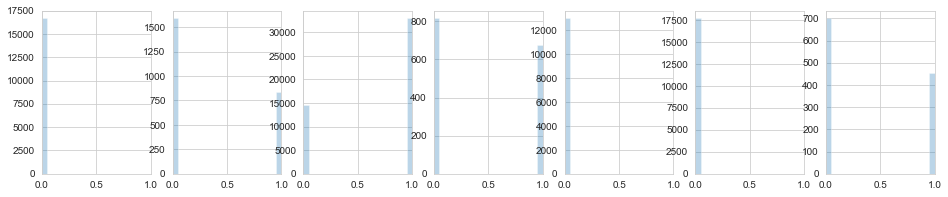

Stay_In_Current_City_Years_2


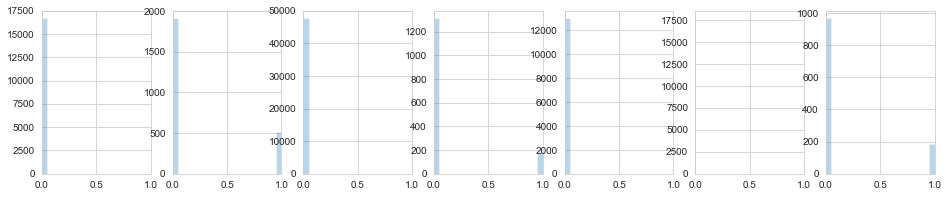

Stay_In_Current_City_Years_3


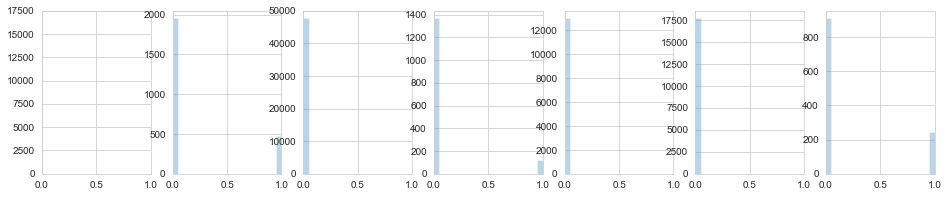

Stay_In_Current_City_Years_4+


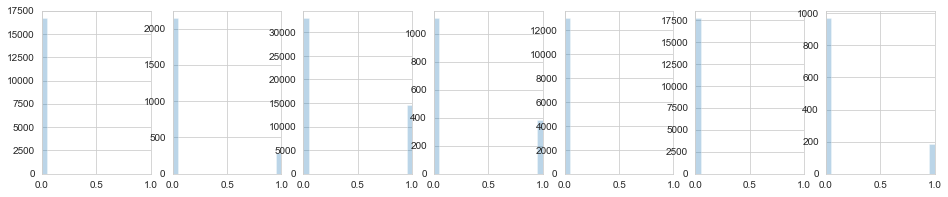

In [5]:
# Analyze the results
df_results = df_results.reset_index()
for cluster in sorted(set(kmeans.labels_)):
    print(collections.Counter(df_results[df_results['cluster']==cluster]['Age']).most_common(5))

n_clusters = len(set(kmeans.labels_))
for col in X_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(kmeans.labels_)):
        plt.subplot(1, n_clusters, i)
        plt.xlim([0,df_results[col].max()])
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
        i += 1
    plt.show()

In [7]:
# Analyze the centroids
df_results.groupby('cluster').mean().round(2).T

cluster,0,1,2,3,4,5,6
index,50018.40,49866.85,50083.47,50621.88,49776.13,50767.08,48680.66
Occupation,8.21,7.91,8.27,7.99,8.27,7.98,7.81
Purchase,8109.72,7993.33,13622.79,10028.15,9426.24,2312.83,9740.79
City_Category_A,0.26,0.30,0.24,0.24,0.26,0.27,0.26
City_Category_B,0.42,0.43,0.41,0.43,0.41,0.43,0.39
City_Category_C,0.32,0.28,0.35,0.33,0.33,0.30,0.34
Stay_In_Current_City_Years_0,0.13,0.14,0.13,0.13,0.14,0.13,0.17
Stay_In_Current_City_Years_1,0.36,0.34,0.35,0.34,0.34,0.34,0.35
Stay_In_Current_City_Years_2,0.18,0.18,0.19,0.19,0.18,0.19,0.17
Stay_In_Current_City_Years_3,0.17,0.18,0.18,0.18,0.18,0.17,0.17


Purchase


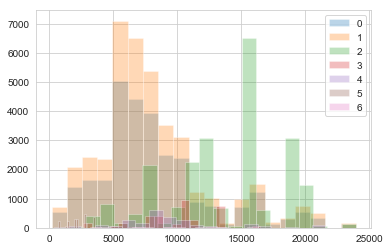

City_Category_A


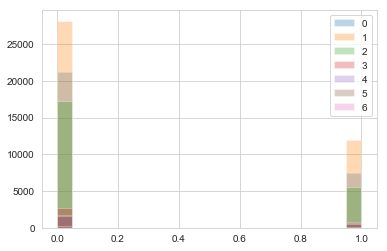

City_Category_B


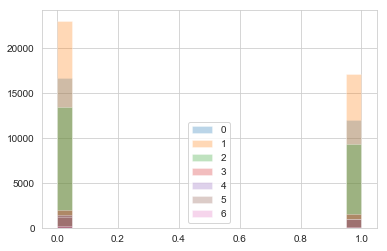

City_Category_C


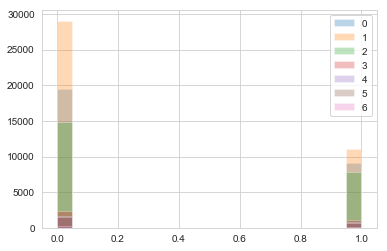

Stay_In_Current_City_Years_0


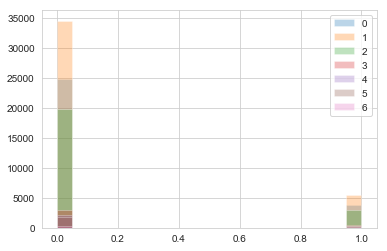

Stay_In_Current_City_Years_1


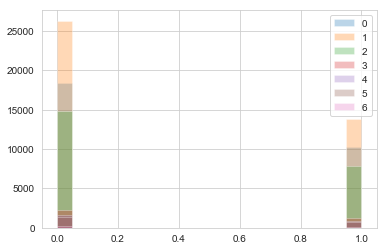

Stay_In_Current_City_Years_2


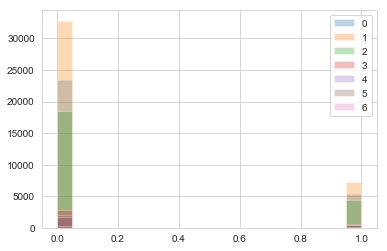

Stay_In_Current_City_Years_3


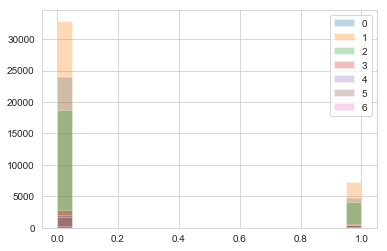

Stay_In_Current_City_Years_4+


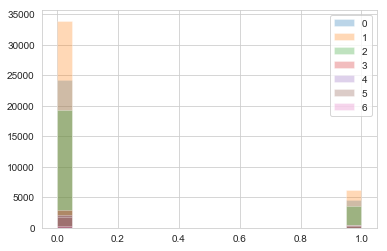

Marital_Status_0


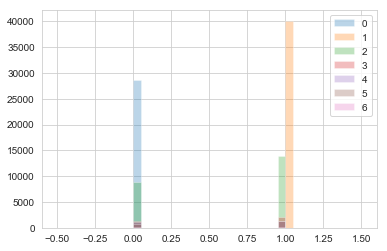

Marital_Status_1


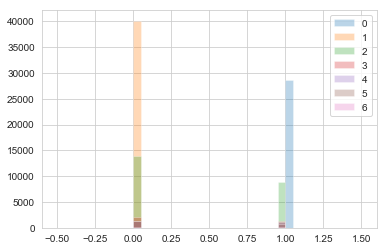

Product_Category_1_1


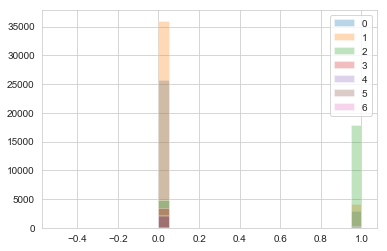

Product_Category_1_2


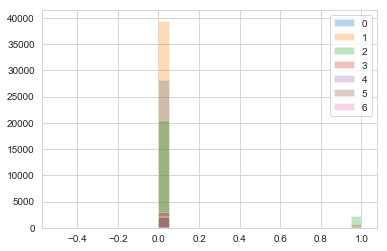

Product_Category_1_3


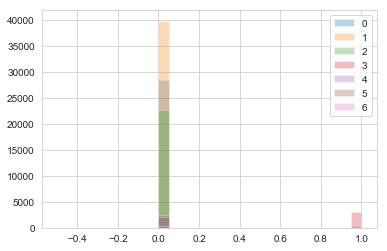

Product_Category_1_4


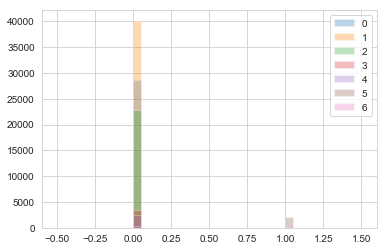

Product_Category_1_5


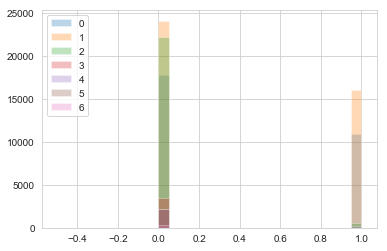

Product_Category_1_6


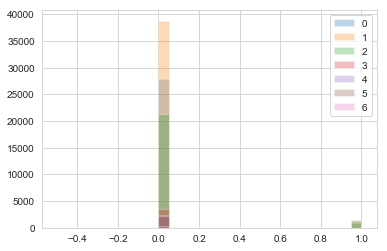

Product_Category_1_7


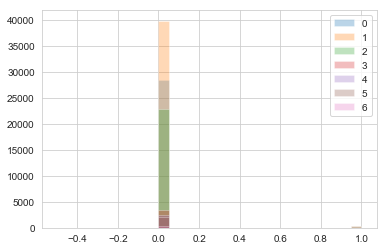

Product_Category_1_8


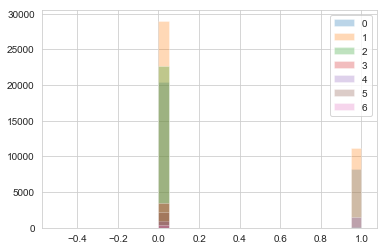

Product_Category_1_9


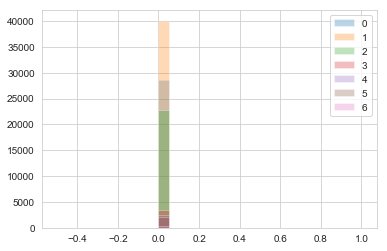

Product_Category_1_10


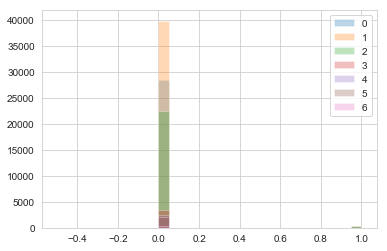

Product_Category_1_11


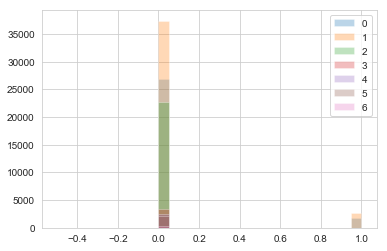

Product_Category_1_12


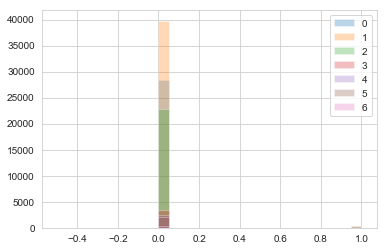

Product_Category_1_13


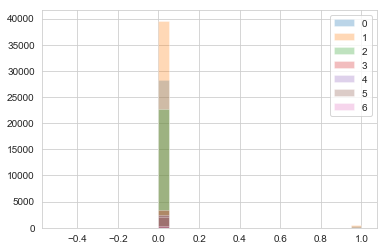

Product_Category_1_14


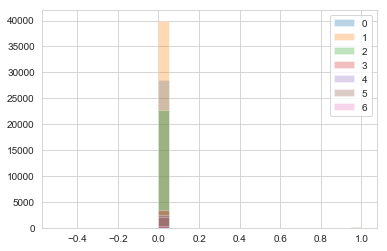

Product_Category_1_15


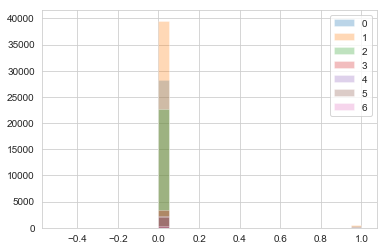

Product_Category_1_16


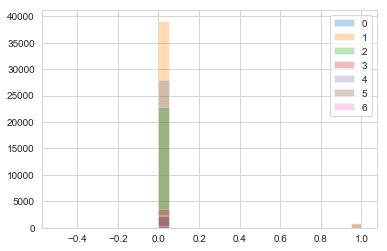

Product_Category_1_17


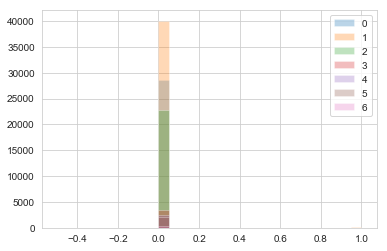

Product_Category_1_18


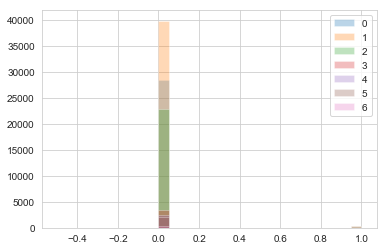

Product_Category_2_0


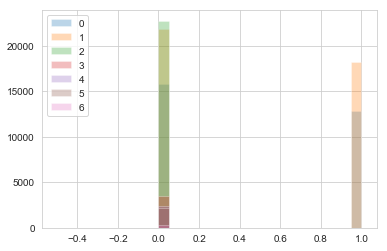

Product_Category_2_2


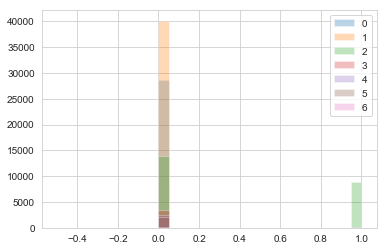

Product_Category_2_3


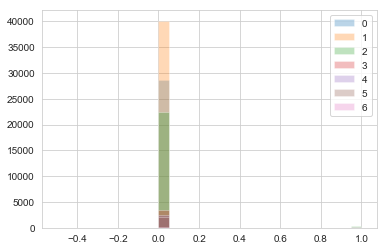

Product_Category_2_4


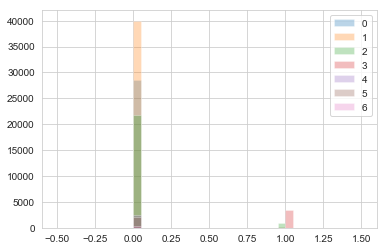

Product_Category_2_5


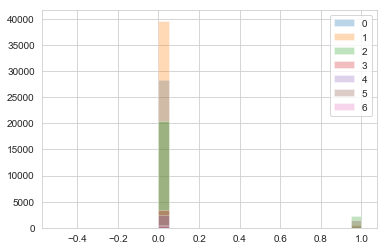

Product_Category_2_6


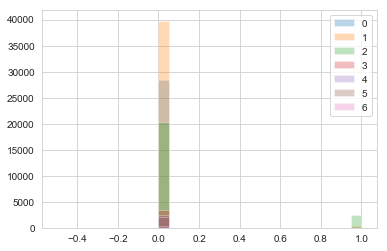

Product_Category_2_7


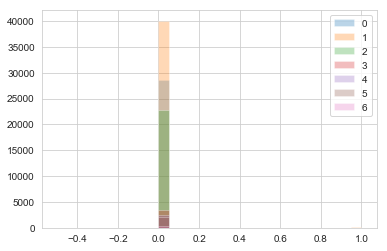

Product_Category_2_8


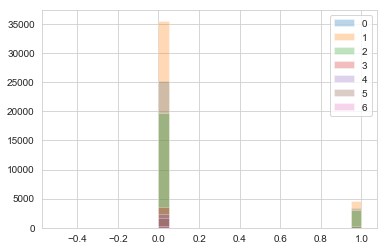

Product_Category_2_9


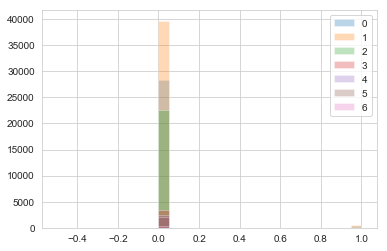

Product_Category_2_10


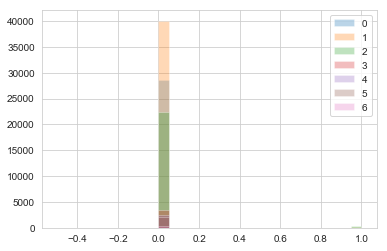

Product_Category_2_11


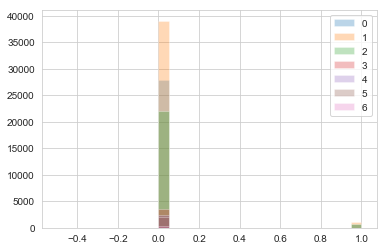

Product_Category_2_12


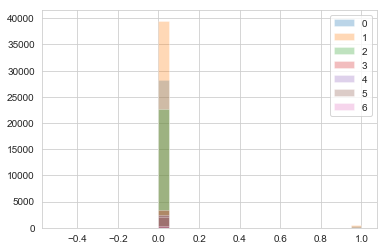

Product_Category_2_13


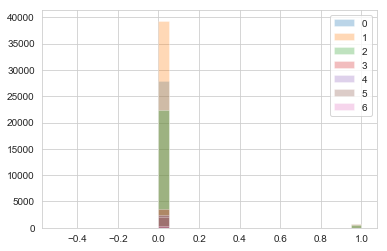

Product_Category_2_14


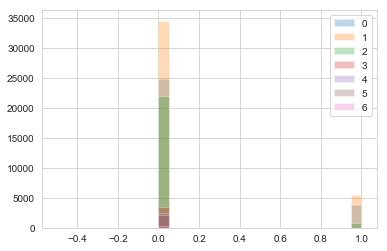

Product_Category_2_15


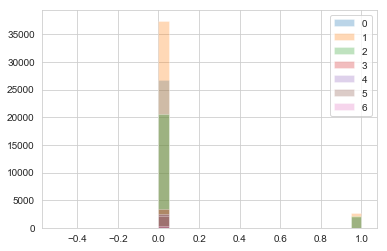

Product_Category_2_16


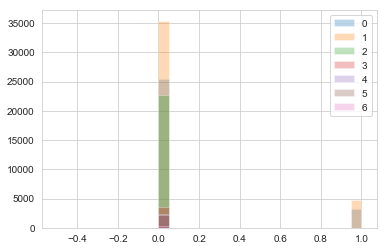

Product_Category_2_17


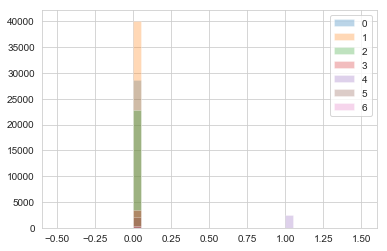

Product_Category_2_18


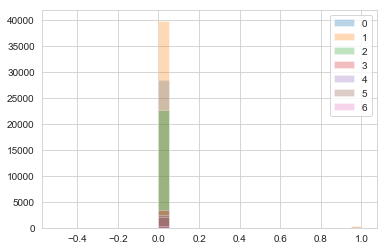

Product_Category_3_0


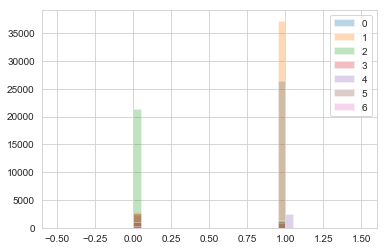

Product_Category_3_3


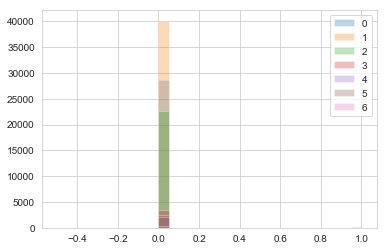

Product_Category_3_4


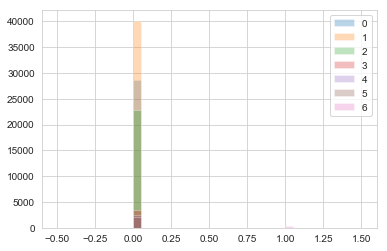

Product_Category_3_5


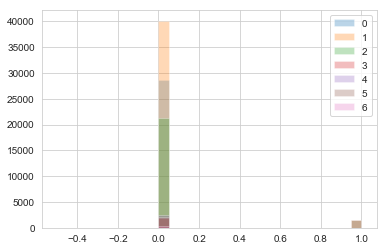

Product_Category_3_6


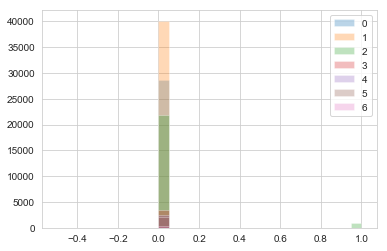

Product_Category_3_8


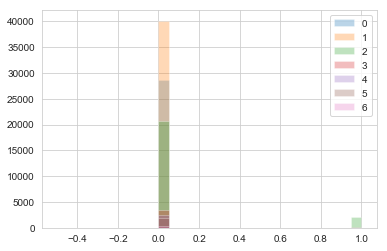

Product_Category_3_9


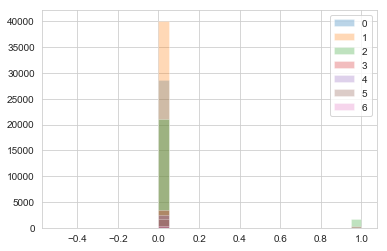

Product_Category_3_10


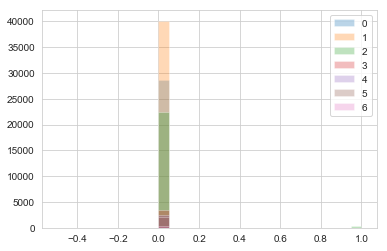

Product_Category_3_11


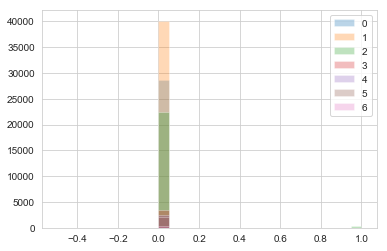

Product_Category_3_12


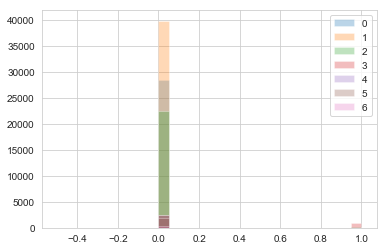

Product_Category_3_13


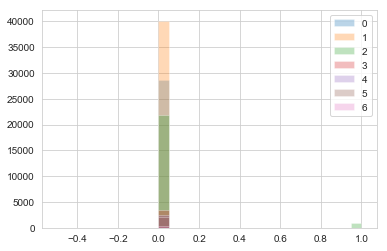

Product_Category_3_14


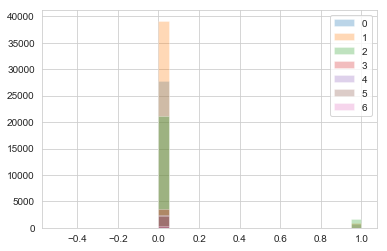

Product_Category_3_15


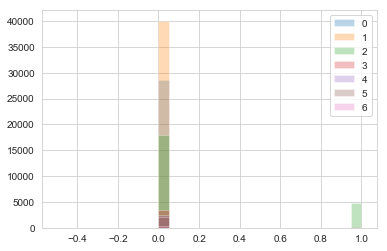

Product_Category_3_16


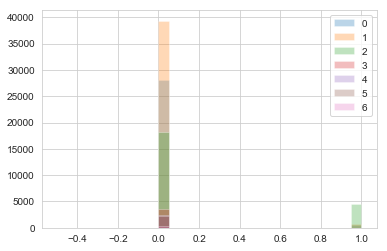

Product_Category_3_17


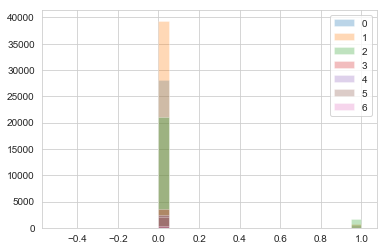

Product_Category_3_18


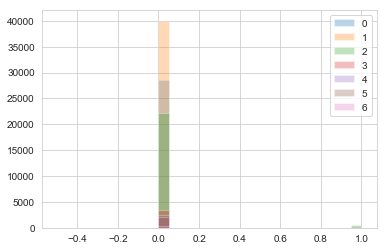

In [8]:
# Analyze the results
for col in X_columns:
    print(col)
    for cluster in set(kmeans.labels_):
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
    plt.legend()
    plt.show()

# Model Evaluation

In [9]:
# Inter-Cluster
centroids = []
for cluster in sorted(set(kmeans.labels_)):
    centroids.append(df_norm[df_norm['cluster']==cluster][X_columns].mean().values)
distances = []
for c1 in centroids:
    for c2 in centroids:
        distances.append(euclidean_distances(c1.reshape(-1, 1), c2.reshape(-1, 1))[0][0])
print('Inter Cluster distance', np.mean(distances))

# Intra-Cluster
distances = []
for cluster in sorted(set(kmeans.labels_)):
    df_filter = df_norm[df_norm['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(-1, 1), v.values.reshape(-1, 1))[0][0])
print('Intra Cluster distance', np.mean(distances))

# Inertia
distances = []
for cluster in sorted(set(kmeans.labels_)):
    df_filter = df_norm[df_norm['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(1, -1), v.values.reshape(1, -1), squared=True)[0][0])
print('Inertia', np.sum(distances))

Inter Cluster distance 0.6513530666297603
Intra Cluster distance 0.6405350572016151
Inertia 5315801.734816577


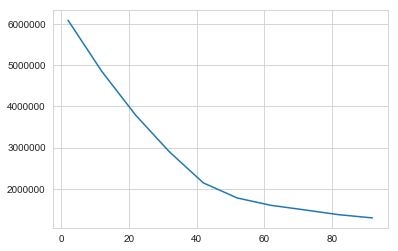

In [10]:
inertia = []
number_k = []
for k in range(2, 100, 10):
    kmeans = KMeans(n_clusters=k).fit(df_norm.values)
    inertia.append(kmeans.inertia_)
    number_k.append(k)
plt.plot(number_k, inertia)
plt.show()